Task # 4 - To Explore Decision Tree Algorithm

In [ ]:
#importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import train_test_split

In [ ]:
#loading iris data
iris = datasets.load_iris()
df= pd.DataFrame(iris.data, columns = iris.feature_names)

In [ ]:
#data processing
target=iris.target
iris.target_names
iris_data=df.copy()
iris_data['species']=target
iris_data['species']=iris_data['species'].map({0:'setosa',1:'versicolor',2:'virginica'})
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
iris_data['species']=le.fit_transform(iris_data['species'])

In [ ]:
#separating input and output
x=iris_data.iloc[:,1:4]
y=iris_data.iloc[:,-1]

In [ ]:
#splitting data into training and testing data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=101)

In [ ]:
#Defining decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#Evaluating our model using confusion matrix
ypred=dtree.predict(xtest)
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(ytest,ypred)

array([[10,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 10]])

In [ ]:
#Got 97% accuracy
accuracy_score(ytest,ypred)

0.9736842105263158

Text(0.5, 1.0, 'Decision Tree Diagram')

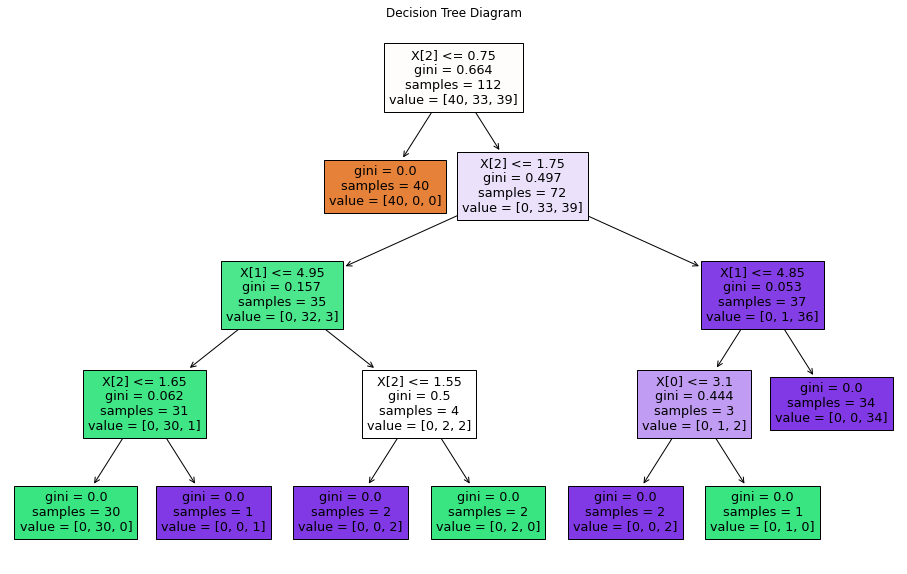

In [ ]:
#Plotting the tree
from sklearn import tree
plt.figure(figsize=(16,10))
tree.plot_tree(dtree,filled=True)
plt.title("Decision Tree Diagram")